In [46]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [47]:
# image loading and input image -> gray
img = cv2.imread("Billiards.png", cv2.IMREAD_GRAYSCALE)

In [48]:
# 임계값 연산자의 출력을 마스크 라는 변수에 저장
# 230 보다 작으면 모든 값은 흰색 처리 / 230 보다 큰 모든 값은 검은색 이 됩니다.
_, mask = cv2.threshold(img, 230, 255, cv2.THRESH_BINARY_INV)

In [53]:
# kernel shape
kernel = []
# 사각형 모형
for i in [cv2.MORPH_RECT, cv2.MORPH_CROSS, cv2.MORPH_ELLIPSE]:
    kernel.append(cv2.getStructuringElement(i, (11, 11)))
    
kernel[2]    

array([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]], dtype=uint8)

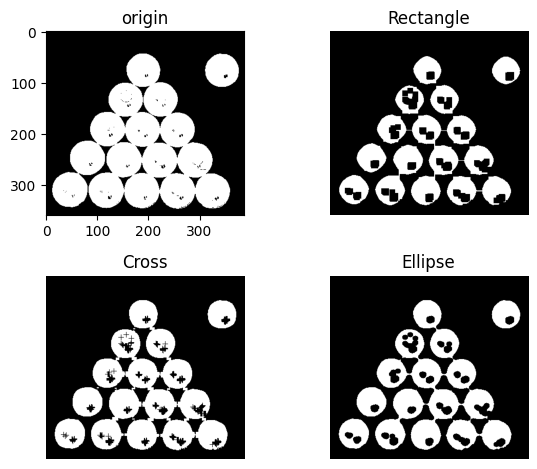

In [55]:
# 비교하기 위해 4개의 모형 출력
title = ['Rectangle', 'Cross', 'Ellipse']
for i in range(3):
    erosion = cv2.erode(mask, kernel[i])
    plt.subplot(2, 2, i + 2)
    plt.imshow(erosion, 'gray')
    plt.title(title[i])
    plt.axis('off')
## erosion example
plt.subplot(2, 2, 1)
plt.imshow(mask, 'gray')
plt.title('origin')
plt.tight_layout()
plt.savefig("10.Erosion with shape.png")
plt.show()


Text(0.5, 1.0, 'origin')

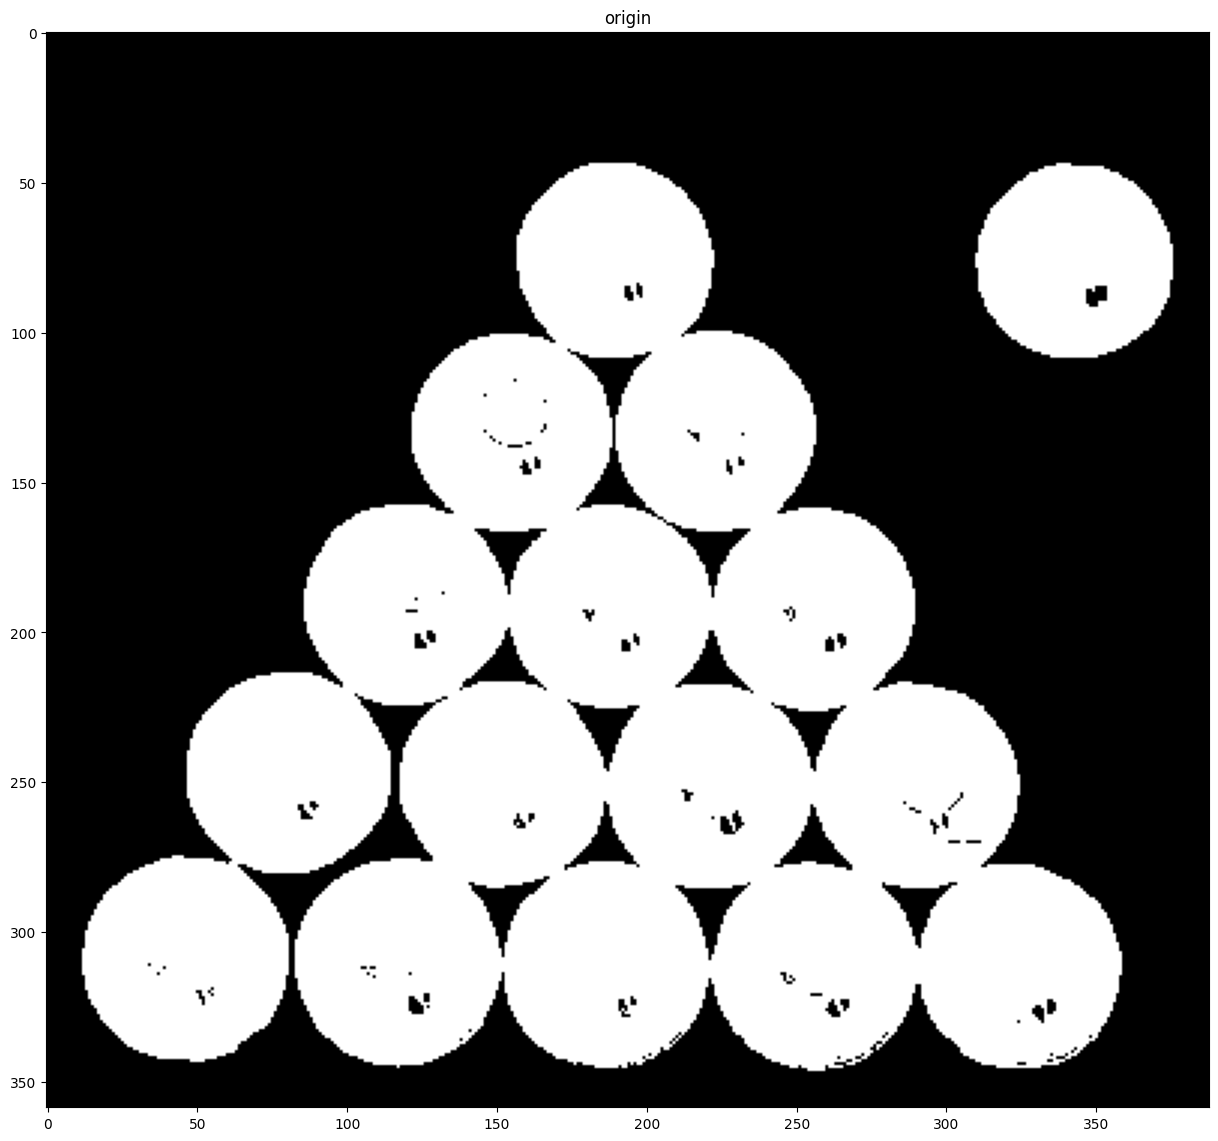

In [57]:

## erosion example
title = ['Rectangle', 'Cross', 'Ellipse']
kernel = np.ones((3,3), np.uint)
plt.figure(figsize=(15, 15))
plt.imshow(mask, 'gray')
plt.savefig("10.Erosion.png")
plt.title('origin')


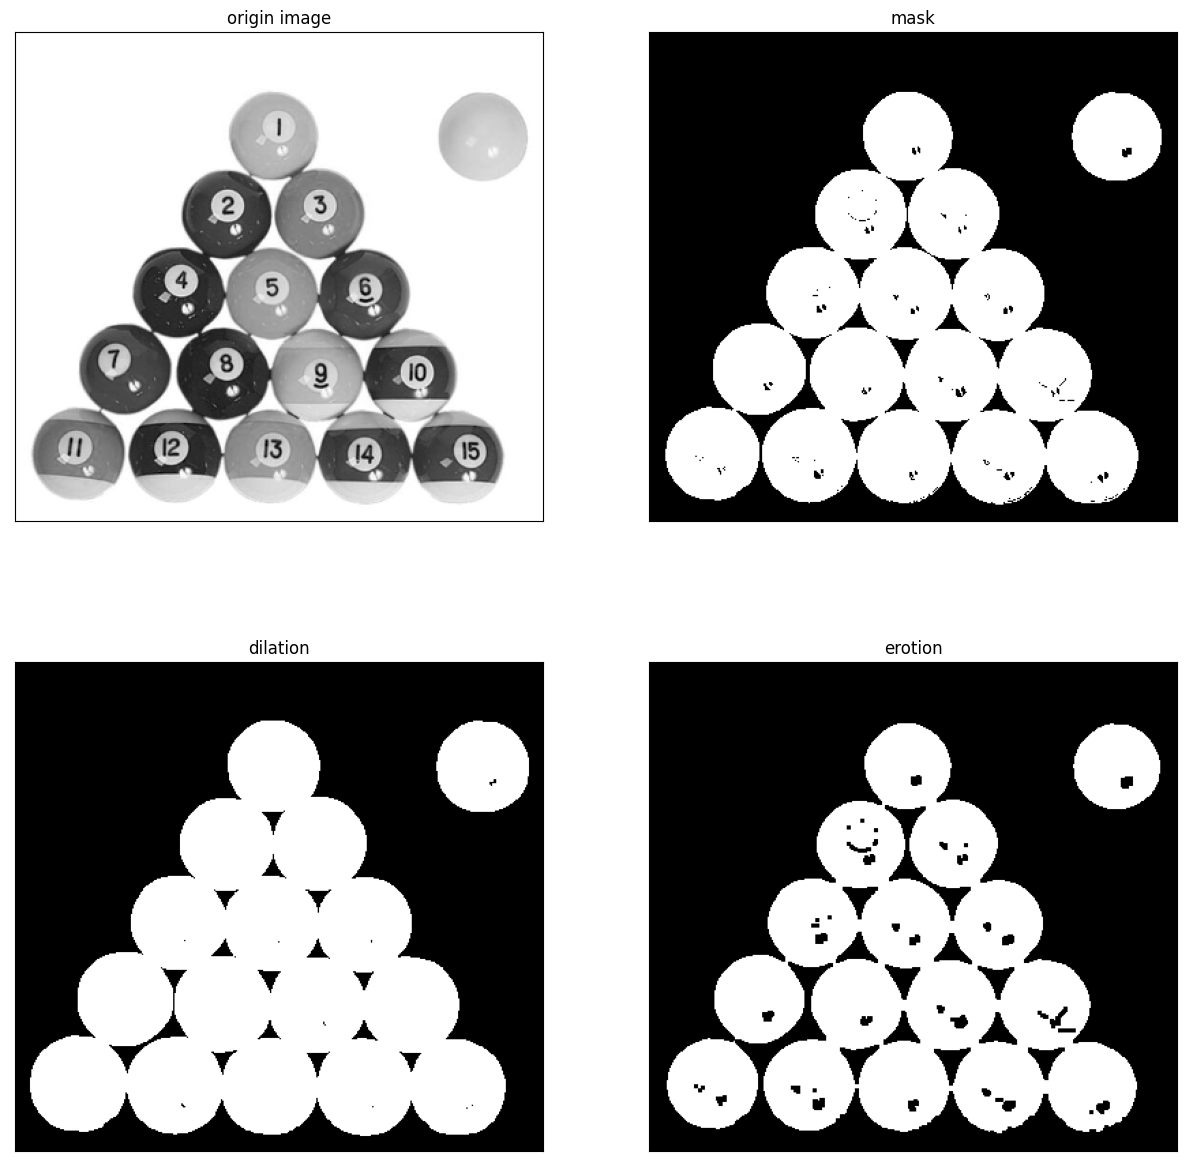

In [59]:
kernel = np.ones((3, 3), np.uint8)
dilation = cv2.dilate(mask, kernel)
erosion = cv2.erode(mask, kernel)
images = [img, mask, dilation, erosion]
title = ['origin image', 'mask', 'dilation', 'erotion']
plt.figure(figsize=(15, 15))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(title[i])
    plt.xticks([])
    plt.yticks([])

plt.savefig("10.Original-Mask-Dilation-Erossion.png")    
plt.show()
